# **DATA TRANSFORMATION**


* **Giriş**
* **1- Data Scaling**
     * **1a- MinMaxScaler**
     * **1b- StandardScaler**
* **2- Data Categorization**
* **3- Feature Engineering**
     * **3a- Feature Construction**
     * **3b- Polynomial Features**
     * **3c- Encoding**
     * **3d- Feature Extraction**
   


![](https://cdn.vox-cdn.com/thumbor/js9LUuD54Ytk4QZKMiCvl8n5e6I=/0x0:1019x679/2050x1367/cdn.vox-cdn.com/uploads/chorus_image/image/34865357/tranformers_ageofextinction3.0.jpg)

# **GİRİŞ**

# Nedir bu Data Transformation?
Veri dönüştürme, veri analitiği ve iş zekası süreçlerinin önemli bir adımını temsil eder. Bu süreç, farklı veri kaynaklarından gelen verilerin, tutarlılık, anlam ve kullanılabilirlik açısından optimize edilmesini içerir. Veri, genellikle farklı biçimlerde ve yapılarla gelir, bu da veri analizi ve raporlama işlemlerini karmaşıklaştırabilir. Veri dönüştürme, bu verileri daha işlenebilir ve anlamlı bir biçime dönüştürerek verimi arttırır.

# **1. Data Scaling**
Veri ölçeklendirme, veri noktalarını belirli bir aralığa veya ölçeklendirmeye dönüştürerek, farklı özelliklerin aynı etkide olmasını veya model eğitimini daha iyi yapmasını sağlayan bir veri ön işleme tekniğidir.
Bu yazıda 2 tane scaling yöntemi göreceğiz.


# **1a- MinMaxScaler**
 

MinMax Scaling, genellikle verileri 0 ile 1 arasındaki değerlere dönüştürür. Bu, scaling yöntemleri arasında sıklıkla kullanılan bir yöntemdir. Genellikle normalize edilmemiş veriler üzerinde çalışır.

![](https://i.stack.imgur.com/EuitP.png)

In [1]:
#gerekli kütüphaneleri importlama
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler #MinMaxScaler
warnings.filterwarnings('ignore')

#titanic dataseti
data = pd.read_csv("/kaggle/input/titanic/train.csv")
data = data.dropna()

#MinMaxScaler
minmax_scaler = MinMaxScaler()

In [2]:
data["Fare_minmax"]=minmax_scaler.fit_transform(data["Fare"].values.reshape(-1,1))

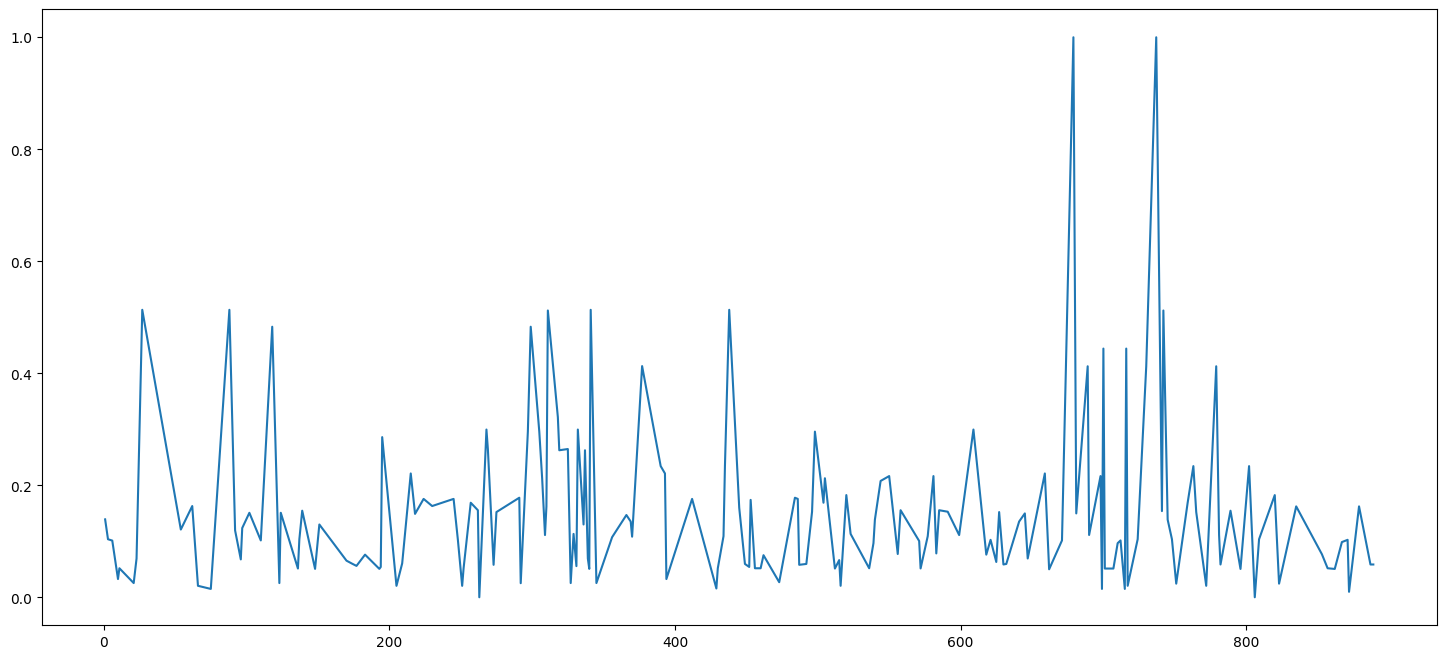

In [3]:
fig , ax = plt.subplots(figsize=(18,8))
ax.plot(data["Fare_minmax"])
plt.show()

In [4]:
min = data["Fare_minmax"].min()
max = data["Fare_minmax"].max()

print(f"En büyük değer : {max}, en küçük değer : {min}")

En büyük değer : 1.0, en küçük değer : 0.0


Grafikte de göründüğü üzere veri 0 ile 1 arasına dönüştürülmüş durumda.

# **1b- StandardScaler**


StandardScaler, verideki ortalamayı 0 ,standart sapmasını 1 yapmaya çalışır. Buna normalizasyon denir. Bazı verilerde ortalamayı 0 olmayabilir. Bunun sebebi örneklem sayısının büyüklüğünden ya da outlier sayısının çok olmasından kaynaklı olabilir.

![](https://miro.medium.com/max/1400/1*xIilonr1kVdoQRRvcpc1ng.png)

In [5]:
#gerekli kütüphaneleri importlama
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler # StandardScaler

#titanic dataseti
data = pd.read_csv("/kaggle/input/titanic/train.csv")
data = data.dropna()

#StandardScaler
standard_scaler = StandardScaler()

In [6]:
data["Fare_std"] = standard_scaler.fit_transform(data["Fare"].values.reshape(-1,1))

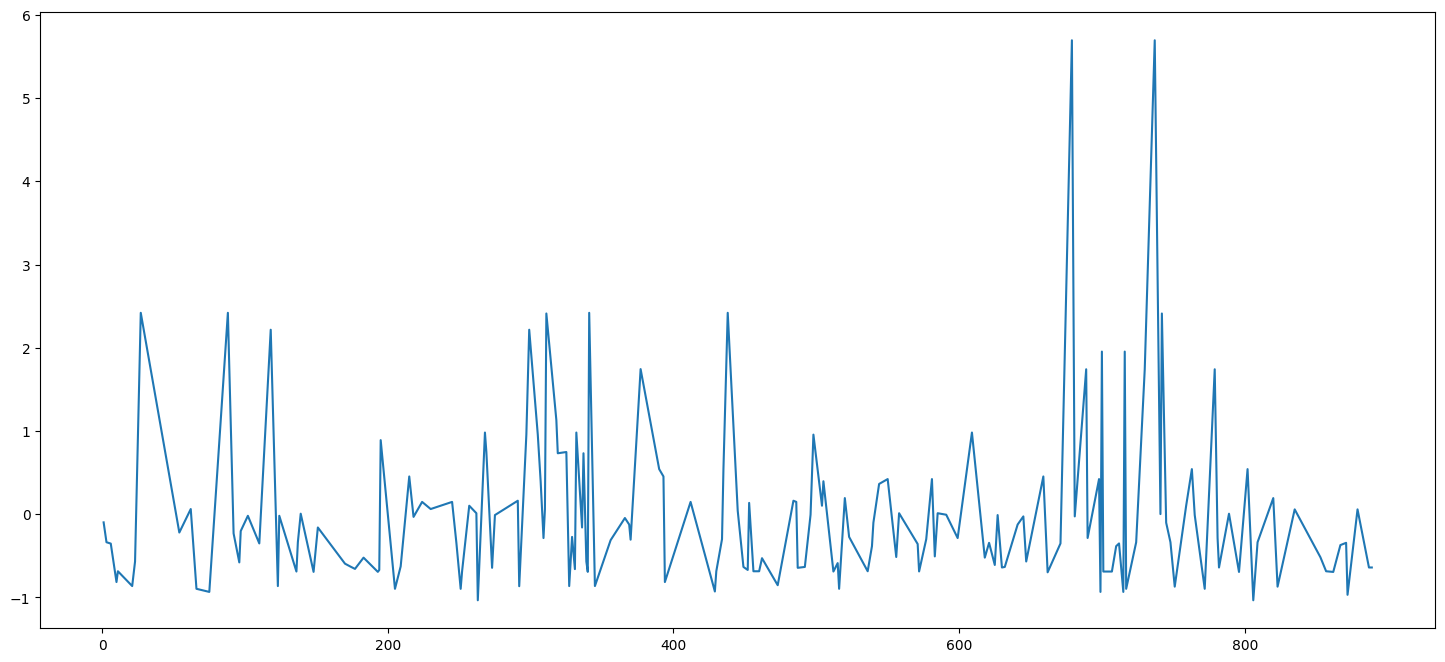

In [7]:
fig , ax = plt.subplots(figsize=(18,8))
ax.plot(data["Fare_std"])
plt.show()

In [8]:
print(f"Verisetinin ortalaması : {data['Fare_std'].mean()}, standart sapması : {data['Fare_std'].std()}")


Verisetinin ortalaması : 1.140556987046609e-16, standart sapması : 1.002743489380263


# **2. Data Categorization**

Data categorization verileri farklı gruplara veya kategorilere ayırmak ve sınıflandırmak amacıyla kullanılan bir veri düzenleme tekniğidir. Bu süreç, verilerin daha kolay anlaşılabilir, erişilebilir ve yönetilebilir olmasına yardımcı olur. Yaşları gösteren bir feature buna örnek olabilir.

In [9]:
#kütüphaneleri importlama
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Titanic veri setini okuma
data = pd.read_csv("/kaggle/input/titanic/train.csv")
data = data.dropna()

#yaşları belli aralıklarda çeşitli yaş gruplarına bölme
bins = [0, 2, 12, 25,40 ,65, np.inf]
age_labels = ['Bebek', 'Çocuk', 'Genç', 'Orta Yaş',"Yetişkin","Yaşlı"]
data["age_categories"] = pd.cut(data["Age"], bins=bins, labels=age_labels)


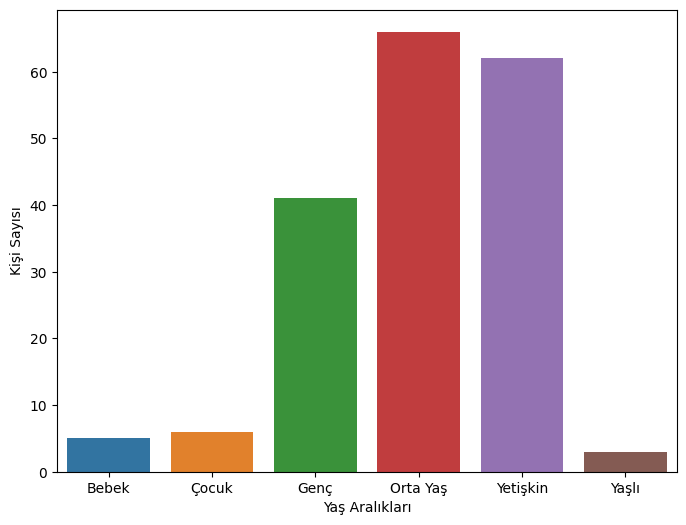

In [10]:
#veri görselleştirme
age_category_counts = pd.DataFrame(data["age_categories"].value_counts().reset_index())
age_category_counts
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(x="age_categories",y="count",data=age_category_counts)
plt.xlabel("Yaş Aralıkları")
plt.ylabel("Kişi Sayısı")
plt.show()

Eğer bu kategorizasyonu modellerde kullanılacak hale getirmek istersek bunu yapabiliriz.

In [11]:
mapping = {'Bebek' : 0 , 'Çocuk' : 1 , 'Genç': 2 , 'Orta Yaş' : 4 ,"Yaşlı" : 5}
data["Age_Categorization"] = data["age_categories"].map(mapping)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_categories,Age_Categorization
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Orta Yaş,4.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Orta Yaş,4.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Yetişkin,NaN
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Çocuk,1.0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Yetişkin,NaN


# **3. Feature Engineering**

Feature engineering veri girdilerini , dönüştürmek, yeni özellikler oluşturmak ve daha iyi makine öğrenimi modelleri oluşturmak amacıyla bu özellikleri optimize etmek anlamına gelir.

Feature engineering, veri madenciliği ve makine öğrenimi projelerinde veri hazırlama aşamasının kritik bir parçasıdır çünkü featurelar, modelin performansını doğrudan etkiler. İyi bir feature engineering, daha az gürültülü ve daha anlamlı verilerle daha iyi sonuçlar elde etmenizi sağlayabilir.

Bazı feature engineering teknikleri aşağıdakliler gibidir.
1. Feature Construction
2. Polynomial Features
3. Dimensionality Reduction
4. Feature Extraction


* # **3a- Feature Construction**

Feature consturction,verisetindeki olan özellikleri kullanarak yeni özellikler üretmekte kullanılır. Bu özellikleri birbiriyle çarparak, bölerek vs. yeni feature'lar üretebiliriz. Örneğin, hız ve zaman feature'ı nı çarparak yol feature'ını üretebiliriz.

In [12]:
#Veri setini okuma
import pandas as pd 

data=pd.read_csv("/kaggle/input/heights-and-weights-dataset/SOCR-HeightWeight.csv").drop(["Index"],axis=1)
data.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [13]:
# Vücut kitle indeksini hesaplamak için boy * (kilo)^2 yapılır.
data[" BMI (lb)/(in)^2"] = data["Height(Inches)"] * np.square(data["Weight(Pounds)"])
data.head()

,Height(Inches),Weight(Pounds),BMI (lb)/(in)^2
0,65.78331,112.9925,8.398756e+05
1,71.51521,136.4873,1.332241e+06
2,69.39874,153.0269,1.625126e+06
3,68.21660,142.3354,1.382025e+06
4,67.78781,144.2971,1.411454e+06


* # **3b- Polynomial Features**

PolynomialFeatures kullanarak kolayca feature'ın çeşitli derecelerini almak için kullanılan basit bir kütüphanedir.

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
poly_features = poly.fit_transform(data[['Height(Inches)', 'Weight(Pounds)']])


In [15]:
pd.DataFrame(poly_features,columns=poly.get_feature_names_out()).head()

,1,Height(Inches),Weight(Pounds),Height(Inches)^2,Height(Inches) Weight(Pounds),Weight(Pounds)^2,Height(Inches)^3,Height(Inches)^2 Weight(Pounds),Height(Inches) Weight(Pounds)^2,Weight(Pounds)^3
0,1.0,65.78331,112.9925,4327.443875,7433.020655,12767.305056,284673.581908,488968.701996,8.398756e+05,1.442610e+06
1,1.0,71.51521,136.4873,5114.425261,9760.917922,18628.783061,365759.196594,698054.094973,1.332241e+06,2.542592e+06
2,1.0,69.39874,153.0269,4816.185114,10619.874046,23417.232124,334237.178490,737005.877758,1.625126e+06,3.583466e+06
3,1.0,68.21660,142.3354,4653.504516,9709.637048,20259.366093,317446.256136,662358.426624,1.382025e+06,2.883625e+06
4,1.0,67.78781,144.2971,4595.187185,9781.584398,20821.653068,311497.675784,663072.184694,1.411454e+06,3.004504e+06


* # **3c- Encoding**

Encdoding feature engineering sürecindeki önemli parçalardan biridir. Kategorik verilerin dönüştürülmesinde kullanılır. Encoding yaparken dikkat edilmesi gerek şey istenilen kategorik verinin hangi tipte olduğudur. Bunlar *nominal* ve *ordinal* kategorik değişken olarak iki başlığa ayrılabilir. 

**1. Nominal Kategorik Değişken**

Nominal veriler,içerisinde sıralama veya derecelendirme içermez. Veriler aralarında bir üstünlük yoktur. Örnek vermek gerekirse cinsiyet verisi, renkler veya ürün kategorileri nominal verilere örnektir. Nominal encoding yöntemi için şunlar kullanılabilir:
* Label Encoding
* One-Hot Encoding

**2. Ordinal Kategorik Değişken**
Ordinal veriler, sıralama veya derecelendirme içerir. Örneğin, eğitim seviyesi (örneğin, ilkokul, ortaokul, lise, üniversite) veya ürün derecelendirmesi (örneğin, düşük, orta, yüksek) ordinal verilere örnektir. Ordinal kategorik değişkenler için custom mapping kullanılabilir. Yani değerler derecelendirme sırasına göre elle girilir.



* # Label Encoder
 Label Encoder, bir sütunu sayısal etiketlere dönüştürmek için kullanılır. Kaç farklı kategorik değişken var ise o sayı kadar değer atar. Örneğin 2 farklı değişkenli bir kategorik veri için 0 ve 1 kullanır.

In [16]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder

data = pd.DataFrame({"Cinsiyet" : ["male","female","male","male","female","male"]})


data["Cinsiyet"].unique() # 2 farklı değer olduğu görülüyor.


array(['male', 'female'], dtype=object)

In [17]:
le =LabelEncoder()
data["Encoding"] = le.fit_transform(data["Cinsiyet"])
data.head()

,Cinsiyet,Encoding
0,male,1
1,female,0
2,male,1
3,male,1
4,female,0


Göründüğü üzere "male" olanları "1", "female" için "0" 

* # One-Hot Encoder



One-Hot Encoder, kategorik (nominal) verileri sayısal verilere dönüştürmek için kullanılan bir feature engineering tekniğidir. Bu teknik, her kategorik değeri bağımsız bir feature olarak temsil eder ve bu sütunları 0 ve 1 değerleriyle doldurur. Her kategorik değer için bir sütun, sadece bir adet "1" değeri içerirken diğer sütunlar "0" değeri alır. Bu, kategorik verilerin sayısal bir formda temsil edilmesini sağlar.

![](https://miro.medium.com/v2/resize:fit:1358/1*ggtP4a5YaRx6l09KQaYOnw.png)

In [18]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Örnek bir DataFrame oluştur
data = {'Renkler': ['Kırmızı', 'Blue', 'Yeşil', "Blue"]}
df = pd.DataFrame(data)
df


,Renkler
0,Kırmızı
1,Blue
2,Yeşil
3,Blue


In [19]:
encoder = OneHotEncoder(sparse=False)  


encoded_data = encoder.fit_transform(df[["Renkler"]])
encoded_columns = encoder.get_feature_names_out(input_features=["Renkler"])
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)
encoded_df

,Renkler_Blue,Renkler_Kırmızı,Renkler_Yeşil
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0


* # **3d- Feature Extraction**
Bu teknik, mevcut olan bir veriden başka veriler çıkarmada kullanılır. Daha çok time series forecasting yaparken kullanılır. Örneğin, bir GG/AA/YY verisinde yıl, ay ve günü tek tek ayrı birer feature'a ayırabiliriz. Bu veriden kullanılacak duruma göre mevsimler, hafta sonları gibi feature'lar üretilebilir.

In [20]:
import pandas as pd 

data = pd.read_csv("/kaggle/input/simulated-sales-data-with-timeseries-features/sales.csv").drop(["Unnamed: 0"],axis=1)
data["Date"] = pd.to_datetime(data["Date"]) #Feature'ın type'ı datetime olmalı.

In [21]:
data["Day"] = data["Date"].dt.day
data["Month"] = data["Date"].dt.month
data["Year"] = data["Date"].dt.year
data.head()

,Date,Sales,Day,Month,Year
0,2021-10-01,29.109547,1,10,2021
1,2021-10-02,30.720435,2,10,2021
2,2021-10-03,30.305173,3,10,2021
3,2021-10-04,27.390893,4,10,2021
4,2021-10-05,22.841123,5,10,2021


<div style="text-align:center;">
  <p><strong>Yazar:</strong> <a href="https://www.linkedin.com/in/eren-%C3%B6zkan-90773525a/" target="_blank">Eren Özkan</a></p>
  <img src="https://static.wixstatic.com/media/3ef854_11e098a45f1c4895a579489e193fd160~mv2.png/v1/fill/w_771,h_771,al_c,q_90,usm_0.66_1.00_0.01,enc_auto/3ef854_11e098a45f1c4895a579489e193fd160~mv2.png" alt="ITU VBK Logo">
  <a href="https://www.ituvbk.com/" target="_blank">İTÜ VBK</a>
</div>
